In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 4)
import pandas as pd
import numpy as np

lgbt = pd.read_csv("european-union-lgbt-survey-2012/LGBT_Survey_ViolenceAndHarassment.csv")

lgbt = lgbt.drop(['notes'], axis=1)
lgbt['percentage'] = [int(x) for x in lgbt['percentage']]
bad_rows = lgbt[lgbt['percentage'] == -1].index
lgbt = lgbt.drop(bad_rows)

lgbt


,CountryCode,subset,question_code,question_label,answer,percentage
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51
...,...,...,...,...,...,...
45350,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Lesbian,1
45351,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Gay,2
45352,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Bisexual,1
45353,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Mixed sexual orientation,5


In [2]:
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

In [3]:
lgbt_synthetic = lgbt.copy() # copying to maintain original for comparison
lgbt_synthetic['percentage'] = np.clip([laplace_mech(x, 1, 1) for x in lgbt['percentage']], 0, 100)
lgbt_synthetic

,CountryCode,subset,question_code,question_label,answer,percentage
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,32.882326
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53.755151
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12.320047
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2.229467
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,50.113992
...,...,...,...,...,...,...
45350,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Lesbian,1.320007
45351,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Gay,0.308916
45352,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Bisexual,0.509825
45353,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Mixed sexual orientation,7.037621


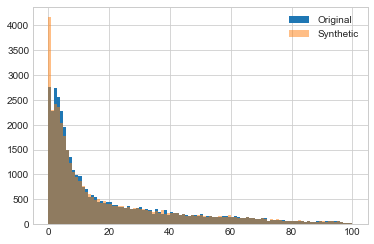

In [4]:
plt.hist(lgbt['percentage'], bins=100, label='Original');
plt.hist(lgbt_synthetic['percentage'], bins=100, alpha=.5, label='Synthetic');
plt.legend();

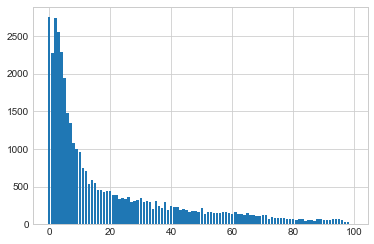

In [9]:
# from lecture notes
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

bins = list(range(0, 100))
counts = [range_query(lgbt, 'percentage', b, b+1) for b in bins]
plt.bar(bins, counts);

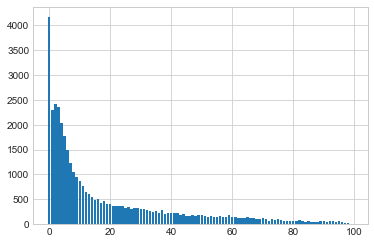

In [10]:
counts = [range_query(lgbt_synthetic, 'percentage', b, b+1) for b in bins]
plt.bar(bins, counts);

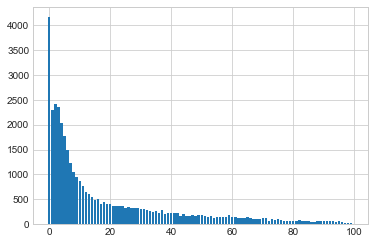

In [33]:
dp_syn_counts = [laplace_mech(c, 1, 1) for c in counts]
plt.bar(bins, dp_syn_counts);

In [41]:
def range_query_synth(syn_rep, a, b): # function from lecture notes
    total = 0
    for i in range(a, b):
        total += syn_rep[i]
    return total

original_count = range_query(lgbt, 'percentage', 50, 100)
synthetic_count = range_query_synth(dp_syn_counts, 50, 100)
print("Original: " + str(original_count))
print("Synthetic: " + str(synthetic_count))
print("Percent Error: " + str(pct_error(original_count, synthetic_count)) + "%")

Original: 4936
Synthetic: 4850.000655940171
Percent Error: 1.742288169769634%
